<a href="https://colab.research.google.com/github/SrinithiBala2021/DECISION-TREE/blob/main/Project119.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data_to_load = files.upload()

Saving titanic.csv to titanic.csv


In [2]:
import pandas as pd

col_names = ['PassengerId','Pclass','Sex','Age','SibSp','Parch','Survived']
df = pd.read_csv("titanic.csv",names = col_names).iloc[1:]
print(df.head)

<bound method NDFrame.head of     PassengerId Pclass Sex   Age SibSp Parch Survived
1             1      3   1  34.5     1     0        0
2             2      1   0    47     1     0        1
3             3      3   0    62     0     0        1
4             4      1   0    27     1     0        1
5             5      3   1    22     0     0        0
..          ...    ...  ..   ...   ...   ...      ...
887         887      2   1    34     0     0        0
888         888      1   0     5     0     0        1
889         889      3   0    52     1     2        0
890         890      1   1    36     0     0        1
891         891      3   1     4     0     0        0

[891 rows x 7 columns]>


In [3]:
features = ['PassengerId','Pclass','Sex','Age','SibSp','Parch']
X = df[features]
y = df.Survived

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

#splitting data in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Initialising the Decision Tree Model
clf = DecisionTreeClassifier()

#Fitting the data into the model
clf = clf.fit(X_train,y_train)

#Calculating the accuracy of the model
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6902985074626866


In [5]:
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image
import pydotplus

dot_data = StringIO() #Where we will store the data from our decision tree classifier as text.

export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=features, class_names=['0','1'])

print(dot_data.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label=<Sex &le; 0.5<br/>gini = 0.463<br/>samples = 623<br/>value = [396, 227]<br/>class = 0>, fillcolor="#f4c9aa"] ;
1 [label=<Pclass &le; 2.5<br/>gini = 0.387<br/>samples = 217<br/>value = [57, 160]<br/>class = 1>, fillcolor="#80c0ee"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<Age &le; 0.5<br/>gini = 0.097<br/>samples = 117<br/>value = [6, 111]<br/>class = 1>, fillcolor="#44a2e6"] ;
1 -> 2 ;
3 [label=<PassengerId &le; 176.0<br/>gini = 0.391<br/>samples = 15<br/>value = [4, 11]<br/>class = 1>, fillcolor="#81c1ee"] ;
2 -> 3 ;
4 [label=<gini = 0.0<br/>samples = 4<br/>value = [0, 4]<br/>class = 1>, fillcolor="#399de5"] ;
3 -> 4 ;
5 [label=<PassengerId &le; 362.5<br/>gini = 0.463<br/>samples = 11<br/>value = [4, 7]<br/>class = 1>, fillcolor="#aad5f4"] ;
3 -> 5 ;
6 [label=<PassengerId &le; 294.5<br/>gini = 0.49<br/>samples = 7<br/>v

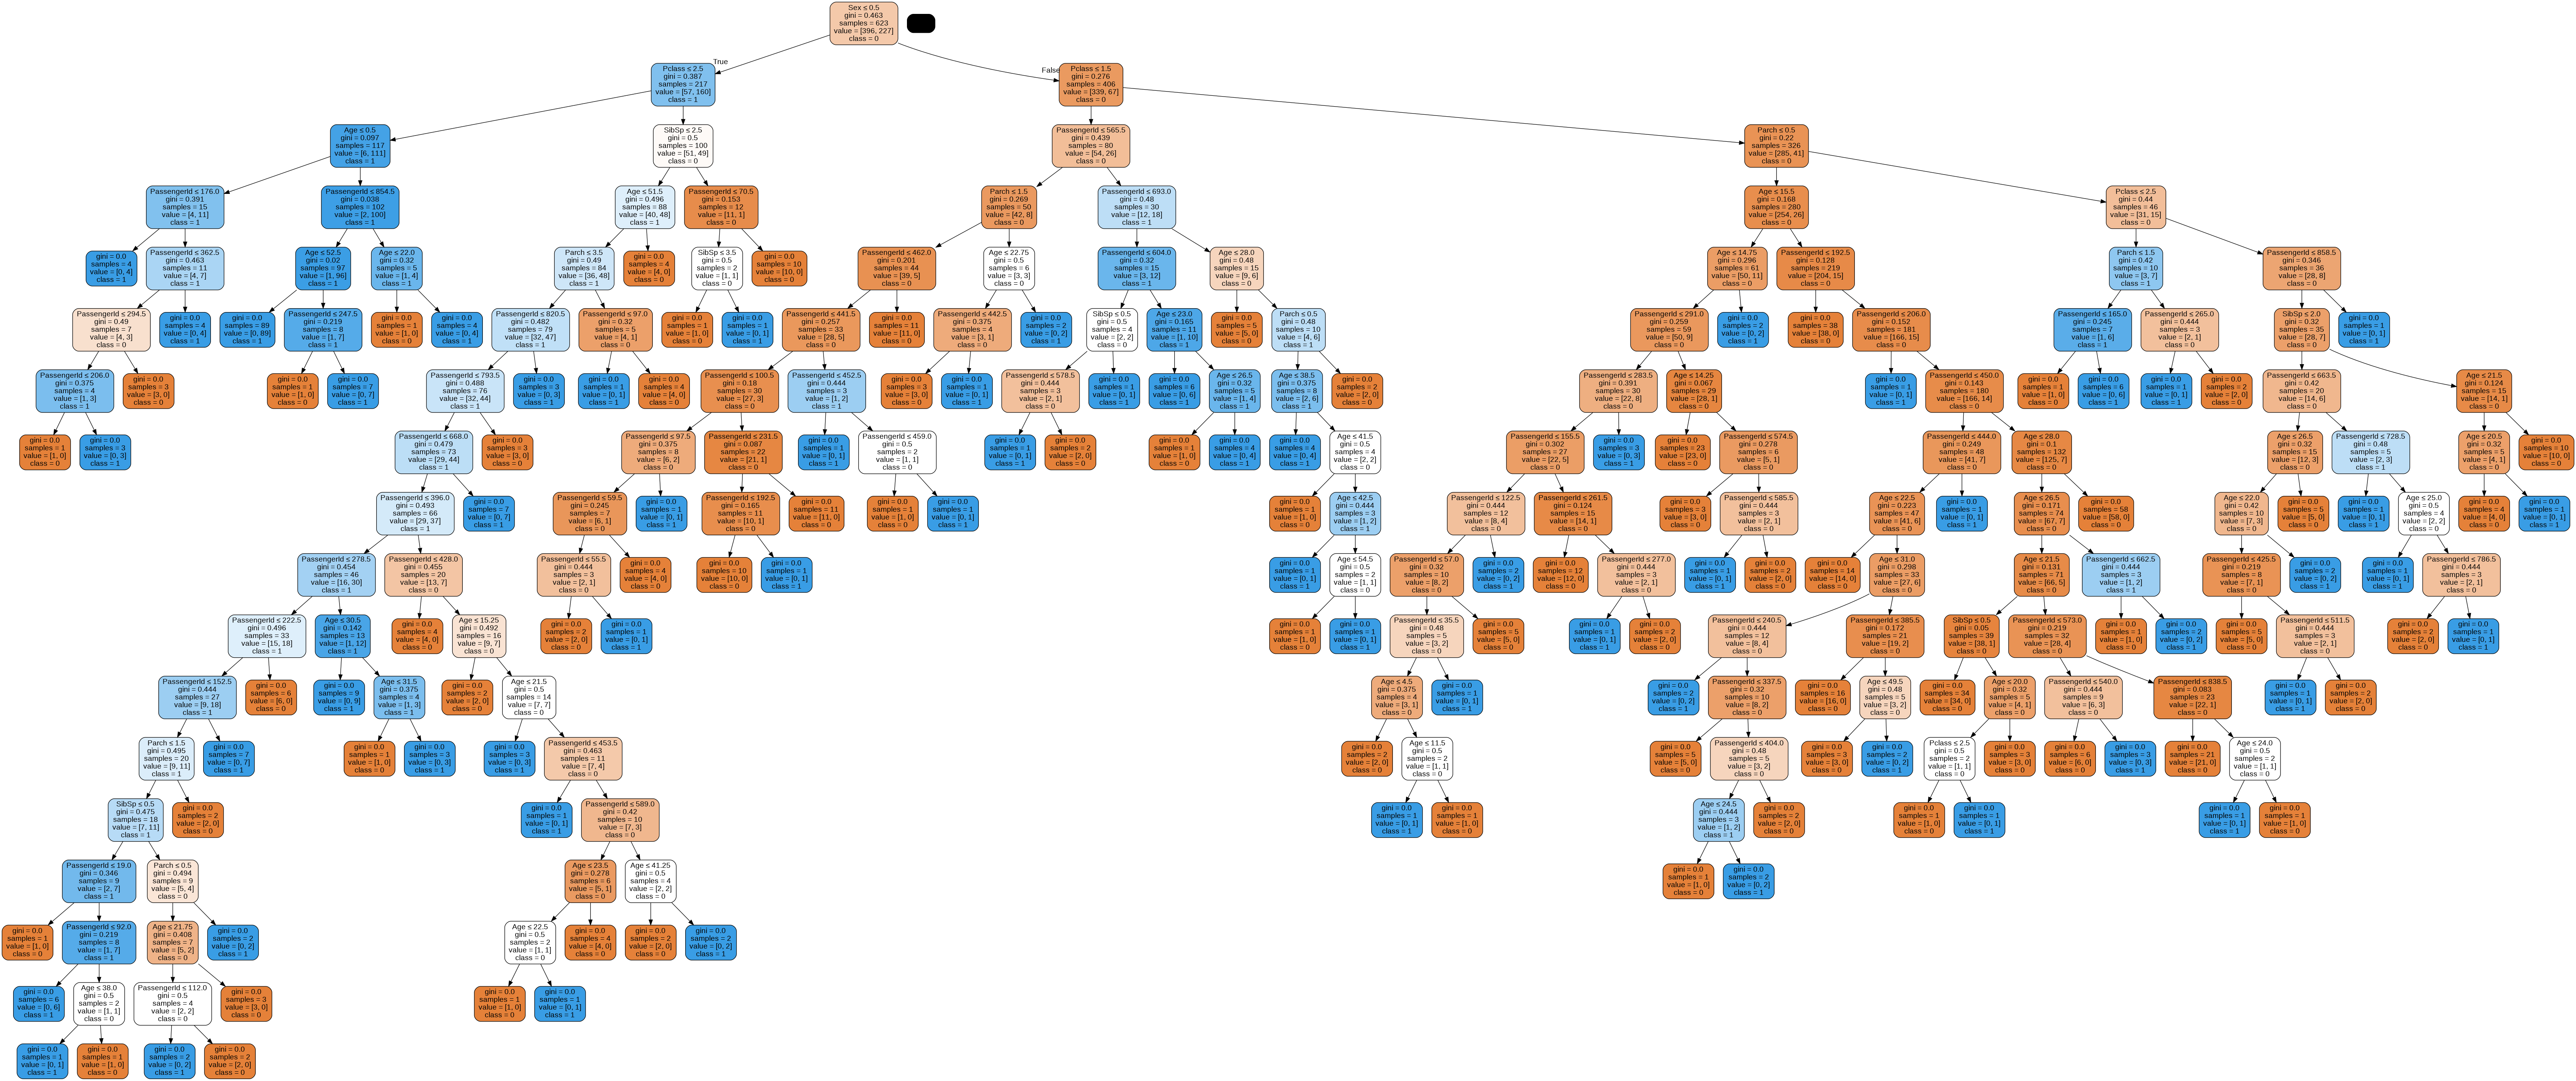

In [6]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [7]:
clf = DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 

Accuracy: 0.746268656716418


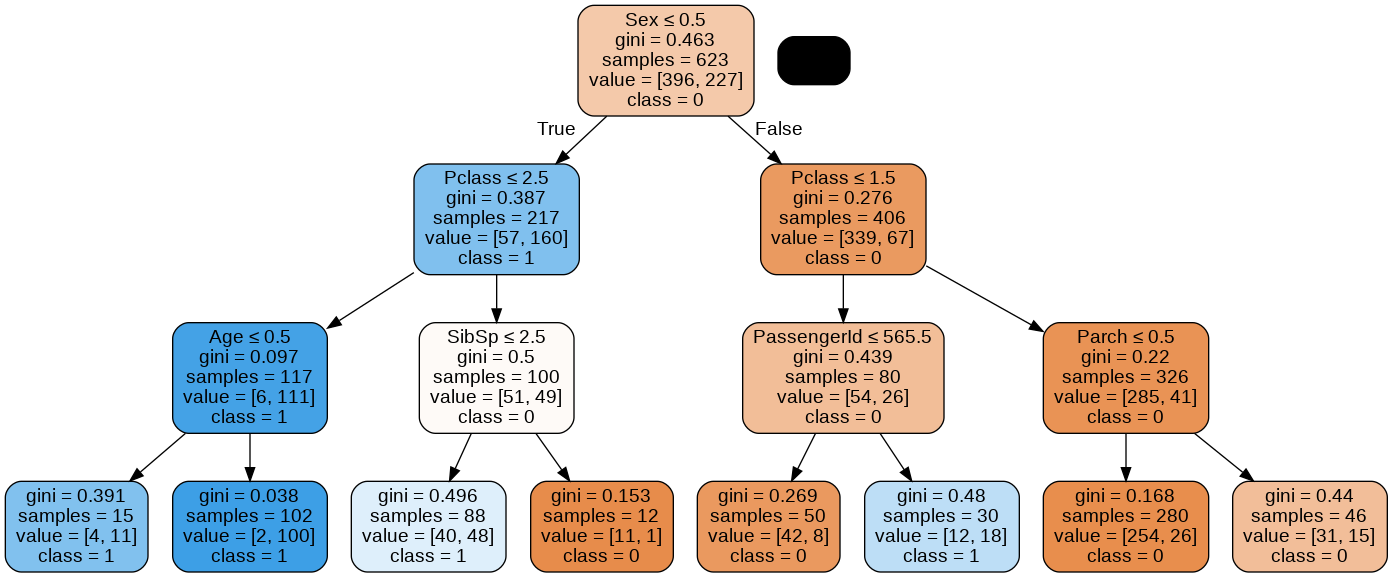

In [8]:
dot_data = StringIO()
export_graphviz(clf,out_file = dot_data,filled=True,rounded=True,special_characters=True,feature_names=features,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())
